# Simple neuralnetwork

Load packages

In [48]:
library(tensorflow)
library(EBImage)

lr = 1e-2

Let's generate some data

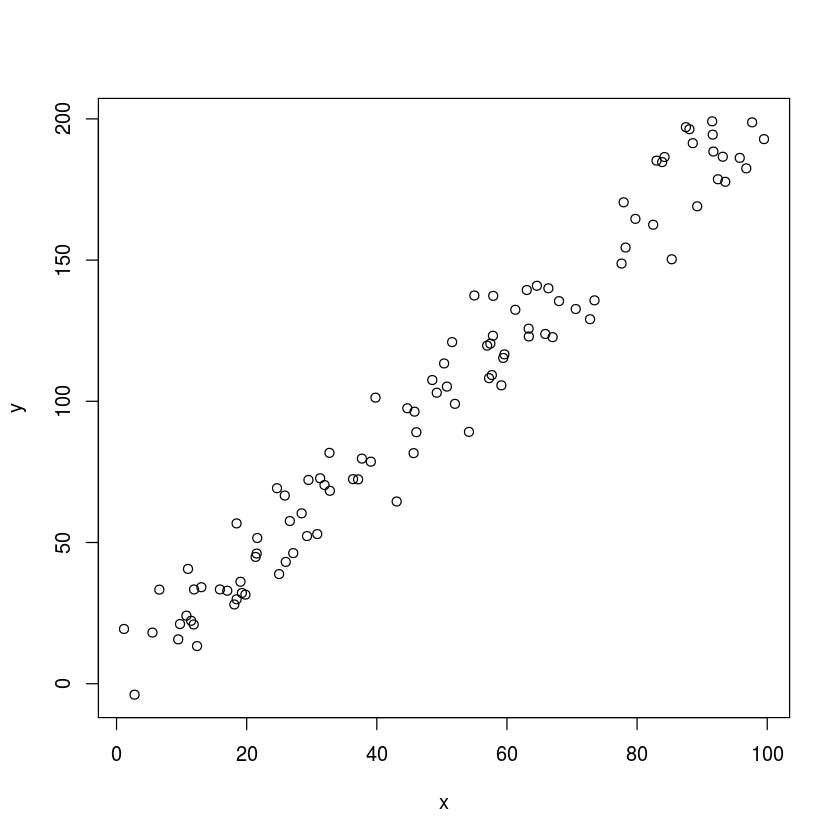

In [49]:
a = 2
b = 1

x= runif(100,1,100)
y = a*x+b 

y = y + rnorm(100,0,10)

plot(x,y)

Define the place holders

In [50]:
input = tf$placeholder(tf$float32, shape(NULL))
label = tf$placeholder(tf$float32, shape(NULL))

Define the variables

In [51]:
a = tf$Variable(tf$truncated_normal(shape(1L), stddev=0.1), 'a')
b = tf$Variable(tf$truncated_normal(shape(1L), stddev=0.1), 'b')

Define the network

In [52]:
output = tf$add( tf$multiply(a, input), b)

Define a cost

In [53]:
cost = tf$reduce_mean( tf$square( tf$subtract(label, output)) )

Define an optimazation method

In [54]:
train_step = tf$train$AdamOptimizer(lr)$minimize(cost)

Initialize the session

In [55]:
sess <- tf$InteractiveSession()
sess$run(tf$global_variables_initializer())

Now let's train

In [56]:
for (i in 1:100) {
  
    #train met gradient descent
  sess$run(train_step, feed_dict = dict(input = x , label = y))
  
 
}


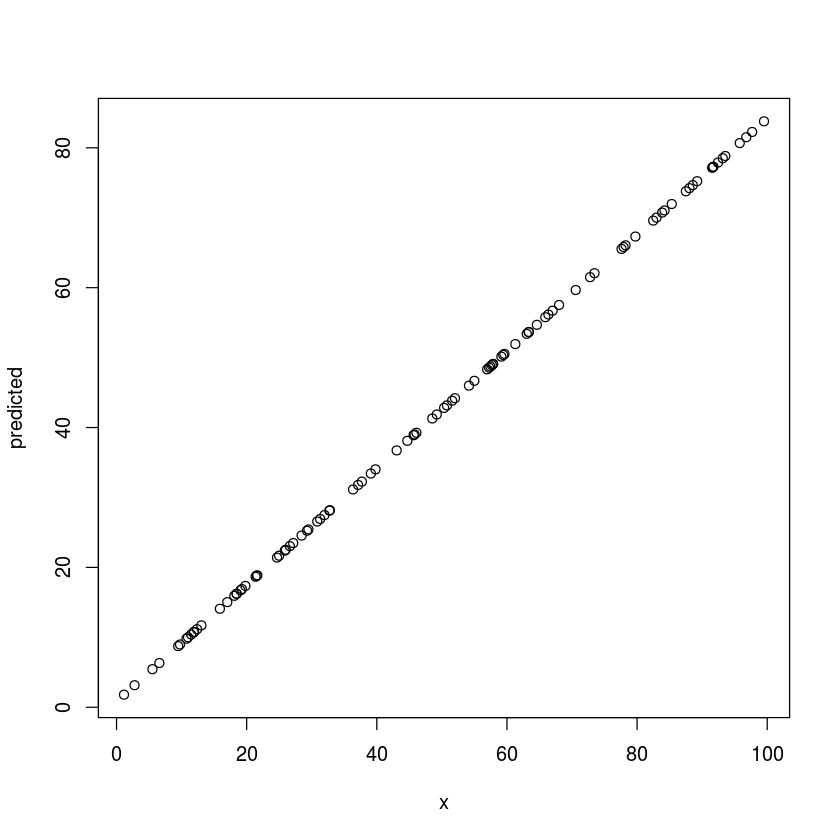

In [58]:
predicted = sess$run(output, feed_dict = dict(input = x))

plot(x, predicted)